In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import GridSearchCV 
import matplotlib.pyplot as plt
from treatment import get_treated_data

[nltk_data] Downloading package stopwords to /home/rafael/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/rafael/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rafael/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/rafael/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
X_train, X_test, y_train, y_test = get_treated_data()

In [8]:
mlp_model = MLPClassifier(max_iter=200)
mlp_model.fit(X_train, y_train)

MLPClassifier()

In [9]:
y_pred = mlp_model.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

Acurácia do modelo: 0.9802690582959641


In [11]:
report = classification_report(y_test, y_pred)
print("Relatório de classificação:")
print(report)

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.96      0.89      0.92       149

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [12]:
confusion_matrix_ = confusion_matrix(y_test, y_pred)

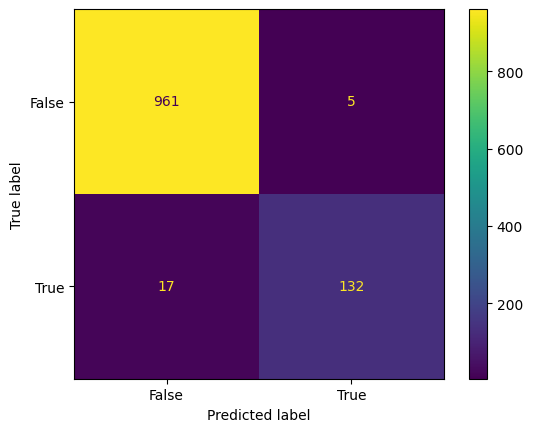

In [13]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])

cm_display.plot()
plt.show()

In [14]:
#Implementação do Grid Search

In [15]:
param_grid = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['logistic', 'relu', 'Tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

In [16]:
grid_search = GridSearchCV(mlp_model, param_grid, refit = True, verbose = 3) 
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.865 total time=   2.7s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.865 total time=   2.8s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.865 total time=   2.5s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.866 total time=   1.5s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.866 total time=   2.2s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.988 total time=  16.7s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.981 total time=  17.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.976 total time=  16.7s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.981 total time=  13.2s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.978 total time=  12.6s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=sgd;, score=0.865 total time=   3.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=sgd;, score=0.865 total time=   9.3s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=inv

/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=sgd;, score=0.866 total time=  18.6s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=sgd;, score=0.134 total time=  16.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=adam;, score=0.985 total time=  14.6s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=adam;, score=0.983 total time=  15.9s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=adam;, score=0.976 total time=  15.8s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=adam;, score=0.981 total time=  17.5s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=adam;, score=0.978 total time=  16.3s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning

/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.987 total time=  18.6s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.983 total time=  16.9s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.976 total time=  16.0s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.979 total time=  13.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.978 total time=  12.2s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.865 total time=   3.2s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.865 total time=   2.5s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score

/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.979 total time=  25.8s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.978 total time=  26.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.865 total time=  18.2s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.865 total time=  20.1s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.865 total time=  19.5s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.866 total time=  11.5s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.866 total time=  17.5s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=adam;, score=0.985 total time=  21.4s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=adam;, score=0.981 total time=  11.4s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=adam;, score=0.978 total time=  20.7s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=adam;, score=0.979 total time=  19.7s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=adam;, score=0.976 total time=  18.8s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.865 total time=   7.8s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.865 total time=   7.7s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.865 total time=   6.5s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.866 total time=   5.

/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.985 total time=  17.7s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.980 total time=  19.2s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.978 total time=  21.0s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.978 total time=  20.2s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.975 total time=   8.4s
[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.865 total time=   2.9s
[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.865 total time=   3.4s
[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.865 total time=   2.9s
[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.866 total time=   1.9s
[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.866 total time=   1.8s


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.865 total time=   3.2s


In [ ]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)


Melhores parâmetros encontrados:
{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}


In [ ]:
best_mlp_model = grid_search.best_estimator_

In [ ]:
best_mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 30, 10))

In [ ]:
grid_pred = best_mlp_model.predict(X_test)

In [ ]:
grid_accuracy = accuracy_score(y_test, grid_pred)
print("Acurácia do modelo:", grid_accuracy)

Acurácia do modelo: 0.9865470852017937


In [ ]:
classification_rep = classification_report(y_test, grid_pred)
print("Relatório de classificação:")
print(classification_rep)

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.98      0.92      0.95       149

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [ ]:
grid_confusion_matrix = confusion_matrix(y_test, grid_pred)

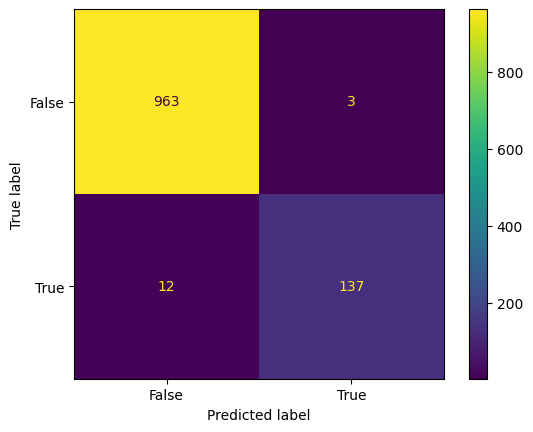

In [ ]:
grid_cm_display = ConfusionMatrixDisplay(confusion_matrix = grid_confusion_matrix, display_labels = [False, True])

grid_cm_display.plot()
plt.show()